-------------------------
-------------------------
# <font color = green> *Lead Scoring Assignment*
    
    Prepared By - Saroj Kumar Pramanik
                  Veerakumar M
                  Subha Shini
    Group       - DSC45
    Date        - 03 January 2023

-------------------------
-------------------------

![Picture title](image-20221222-235101.png)

## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

![Picture title](image-20221222-234109.png)

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. __The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.__

## Our Goals of the Case Study:

- To **build a logistic regression model to assign a lead score** between 0 and 100 to each of the leads which can be used by the company to target potential leads. 
- To **adjust to if the company's requirement changes** in the future so you will need to handle these as well.

### The steps are broadly:

1. Read and understand the data
2. Clean the data
3. Prepare the data for Model Building
4. Model Building
5. Model Evaluation
6. Making Predictions on the Test Set

### Importing libraries

In [1371]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [1372]:
# Importing Pandas and NumPy

import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Loading and Cleaning Data

In [1373]:
# Loading the data using Pandas

df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1374]:
# checking the shape of the data 'df'

df.shape

(9240, 37)

In [1375]:
# Checking info() of the "df"

df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1376]:
df.dtypes.value_counts()

object     30
float64     4
int64       3
dtype: int64

In [1377]:
# Checking the column names

df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1378]:
# Describing data

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Understanding :

- The Data frame is having 9270 rows and 37 columns.

- 30 columns have Object type and the rest of the others are either float or integer.

- Looking into the data the dtype Object is the Date type.

- Looking into the data few fields seem to be categorical in nature.

- We can see that there are missing values present in our data.


# Data Quality Check

In [1379]:
# Sorting % of null valaues of each column in decending order

x = (df.isnull().sum()/len(df)*100)
x.sort_values(ascending = False).head(30)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [1380]:
#check for duplicates

print(sum(df.duplicated(subset = 'Prospect ID')) == 0)
print(sum(df.duplicated(subset = 'Lead Number')) == 0)

True
True


There is no duplicate Value found in 'Prospect ID' & 'Lead Number'. Clearly Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped.

# EXPLORATORY DATA ANALYSIS

### Data Cleaning & Treatment:

In [1381]:
#dropping 'Lead Number' and 'Prospect ID' since they have all unique values

df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

__1)Handling the 'Select' level that is present in many of the categorical variables.__

We observe that there are 'Select' values in many columns.It may be because the customer did not select any option from the list, hence it shows 'Select'.'Select' values are as good as NULL. So we can convert these values to null values.

In [1382]:
#Converting 'Select' values to NaN.

df = df.replace('Select', np.nan)

In [1383]:
# Sorting % of null valaues of each column in decending order

x = (df.isnull().sum()/len(df.index)*100)
x.sort_values(ascending = False).head(30)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [1384]:
#dropping cols with more than 45% missing values.

cols=df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)

In [1385]:
# Sorting % of null valaues of each column in decending order

x = (df.isnull().sum()/len(df.index)*100)
x.sort_values(ascending = False).head(30)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

### Categorical Attributes Analysis:

In [1386]:
# To familiarize all the categorical values
for column in df:
    print(df[column].astype('category').value_counts())
    print('\n----------------------------------------------------------------------------------------')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

----------------------------------------------------------------------------------------
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64

----------------------------------------------------------------------------------------
No     8506
Yes     734
Name: Do Not Email, dtype:

___There is a huge value of null variables in some columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.___

In [1387]:
# Imputing Values

df['Specialization'] = df['Specialization'].fillna('Not Provided') 
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('Not Provided')
df['What is your current occupation'] = df['What is your current occupation'].fillna('Not Provided')
df['Tags'] = df['Tags'].replace(np.nan,'Not Specified')

#Since most values are 'Mumbai' , we can impute missing values in this column with this value.
# Imputing the missing data in the 'City' column with 'Mumbai'
df['City']=df['City'].replace(np.nan,'Mumbai')

# Imputing the missing data in the 'Country' column with "Not Provided"
df['Country']=df['Country'].replace(np.nan,"Not Provided")

# Sorting % of null valaues of each column in decending order

x = (df.isnull().sum()/len(df.index)*100)
x.sort_values(ascending = False).head(30)

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Lead Origin                                      0.000000
X Education Forums                               0.000000
A free copy of Mastering The Interview           0.000000
I agree to pay the amount through cheque         0.000000
City                                             0.000000
Get updates on DM Content                        0.000000
Update me on Supply Chain Content                0.000000
Tags                                             0.000000
Receive More Updates About Our Courses           0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
Magazine                                         0.000000
Newspaper Arti

In [1388]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

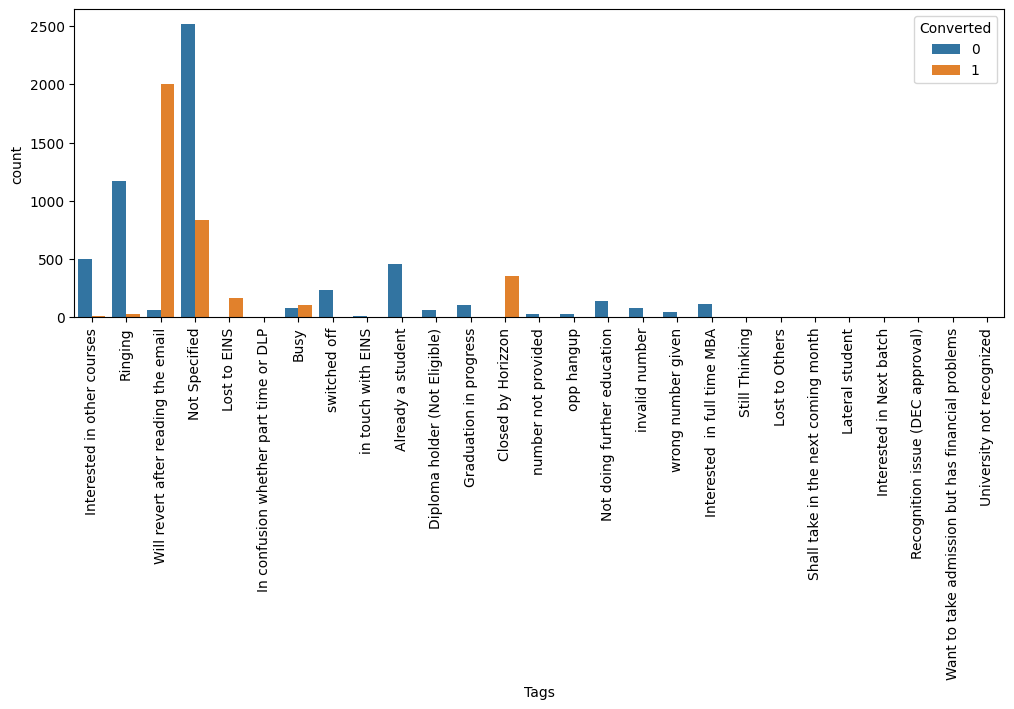

In [1389]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(12,4))
s1=sns.countplot(x= df['Tags'], hue=df.Converted, data = df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [1390]:
#replacing tags with low frequency with "Other Tags"

df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

df['Tags'] = df['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [1391]:
# There are somany country listed with very less count so divideing country in to 3 as below.

def slots(val):
    category = ""
    if val == "India":
        category = "India"
    elif val == "Not Provided":
        category = "Not Provided"
    else:
        category = "Outside India"
    return category

df['Country'] = df.apply(lambda val:slots(val['Country']), axis = 1)
df['Country'].value_counts()

India            6492
Not Provided     2461
Outside India     287
Name: Country, dtype: int64

In [1392]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Provided,...,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


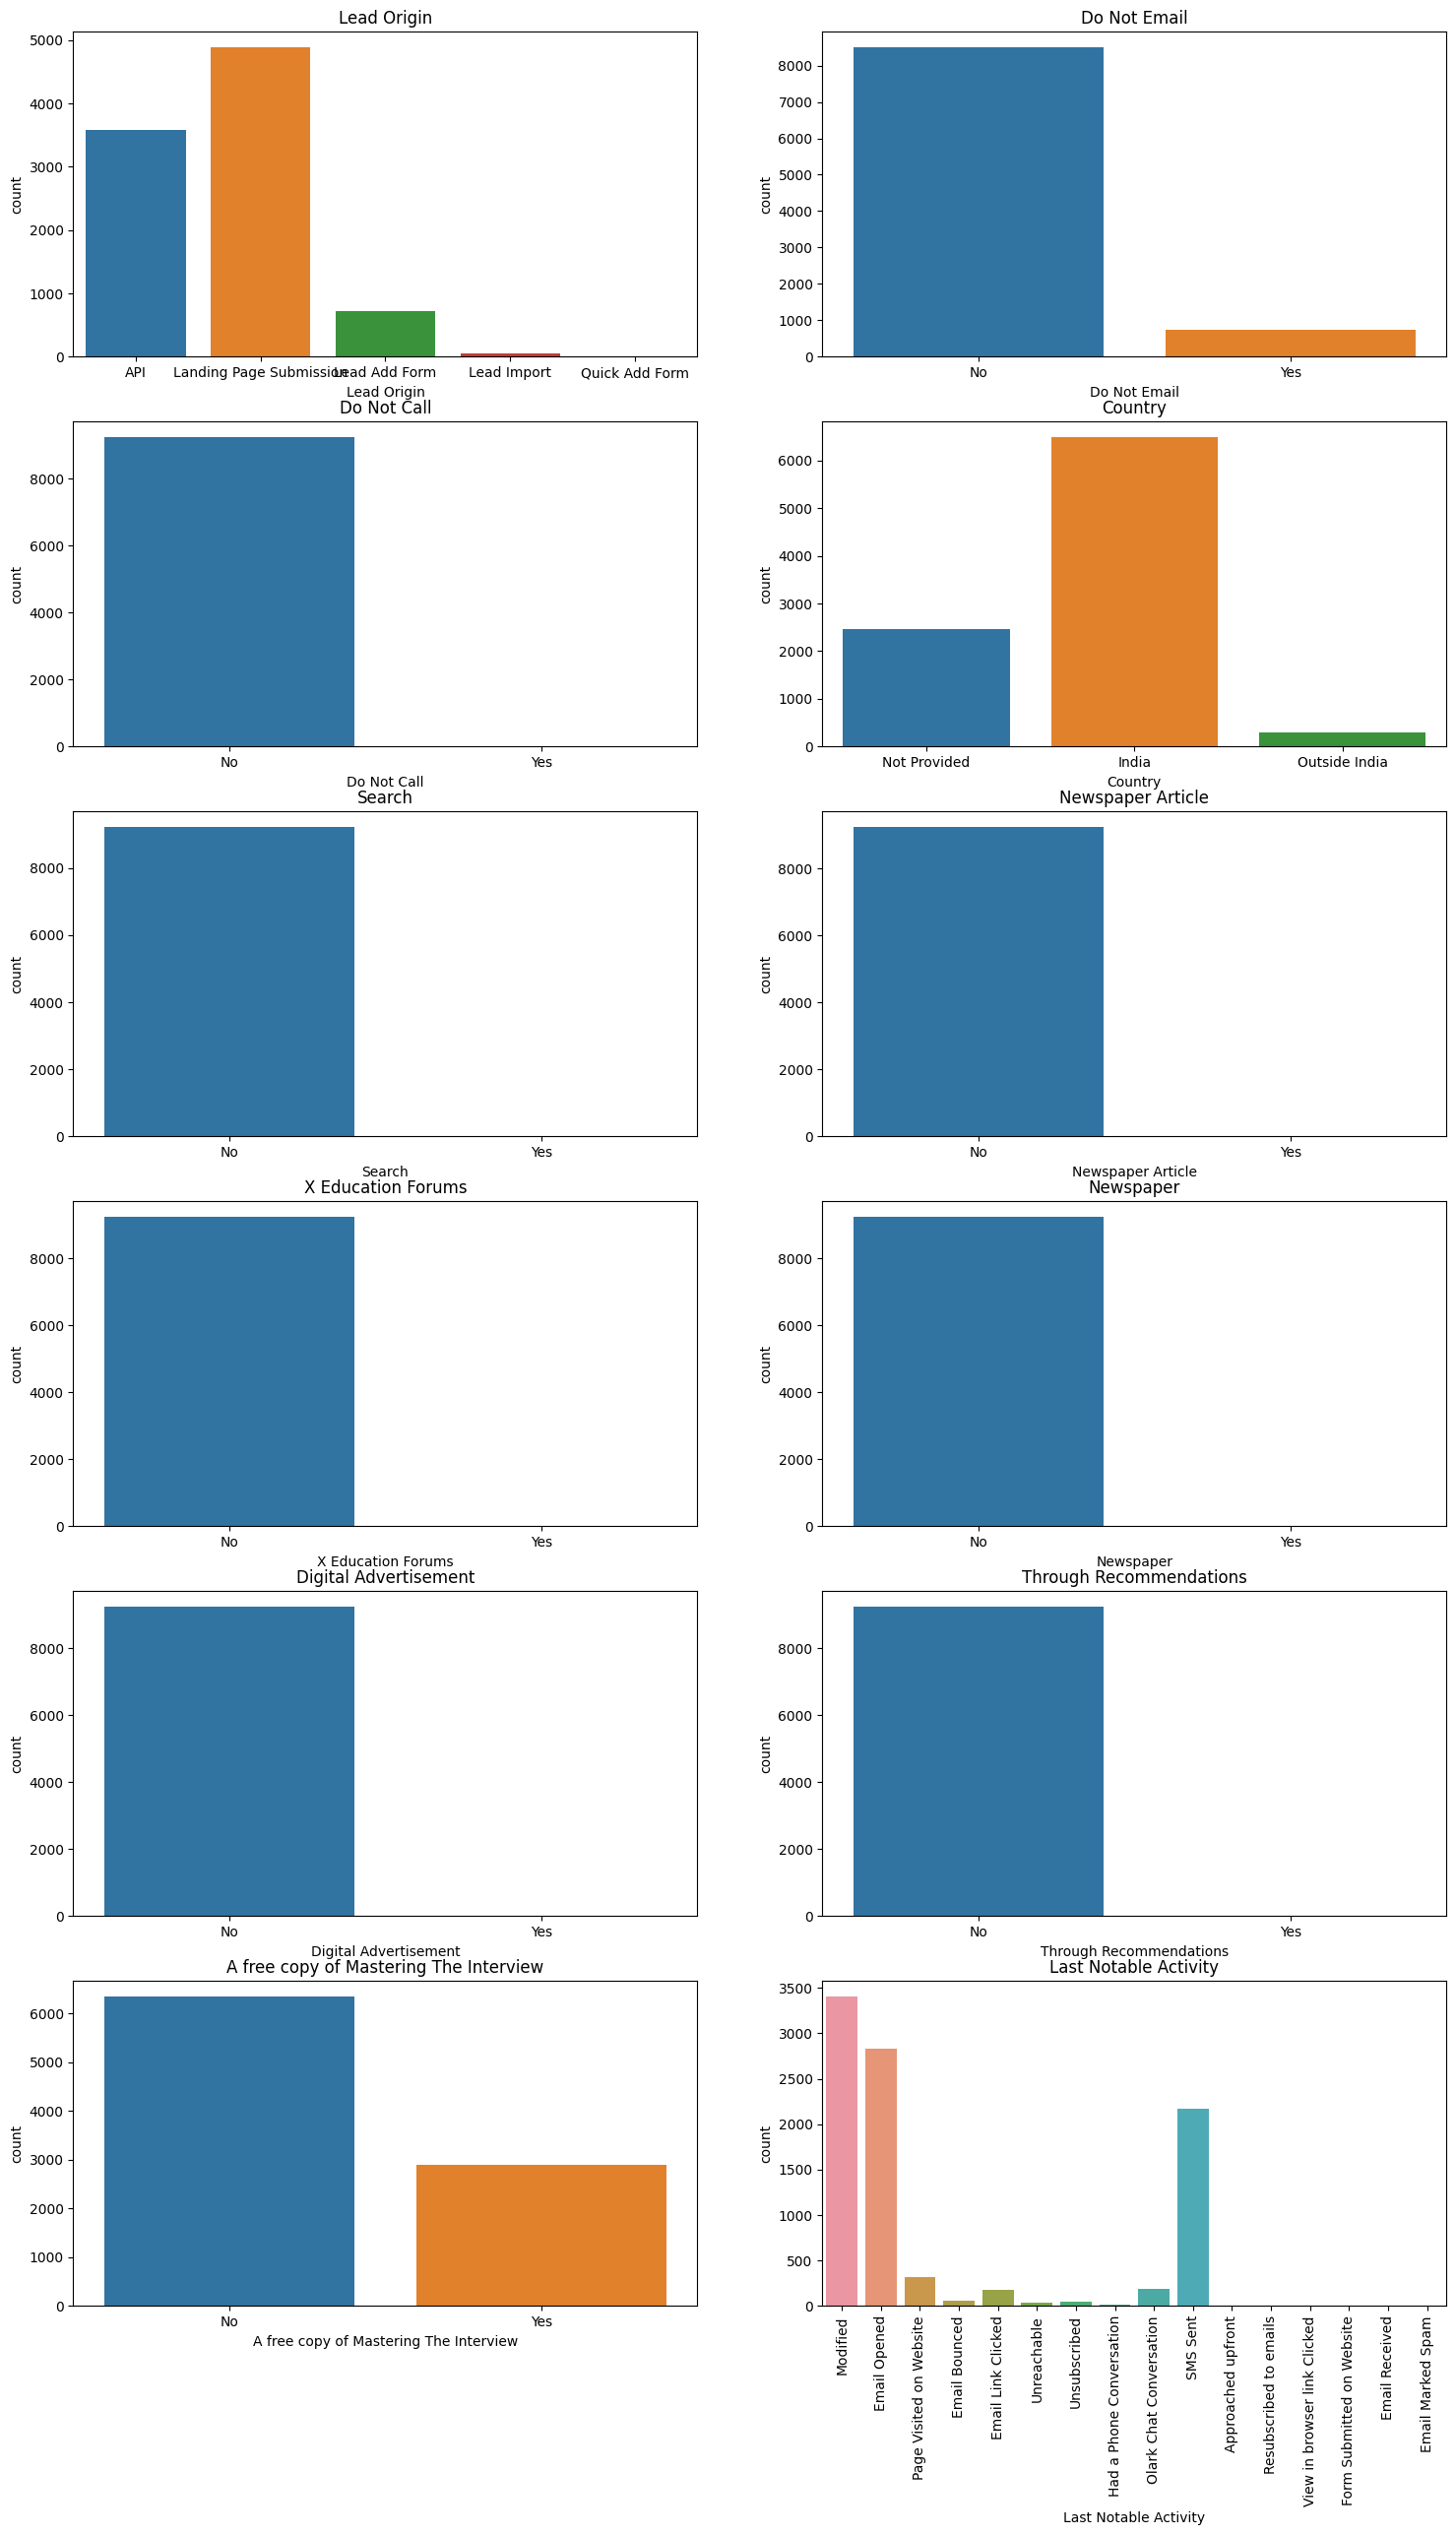

In [1393]:
plt.figure(figsize = (18,30))

plt.subplot(6,2,1)
sns.countplot(data= df, x=df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(data = df, x= df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(data = df, x= df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(data= df, x= df['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(data= df , x= df['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(data= df, x= df['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(data= df, x= df['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(data= df, x= df['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(data= df, x= df['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(data= df, x= df['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(data= df, x= df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(data= df, x= df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

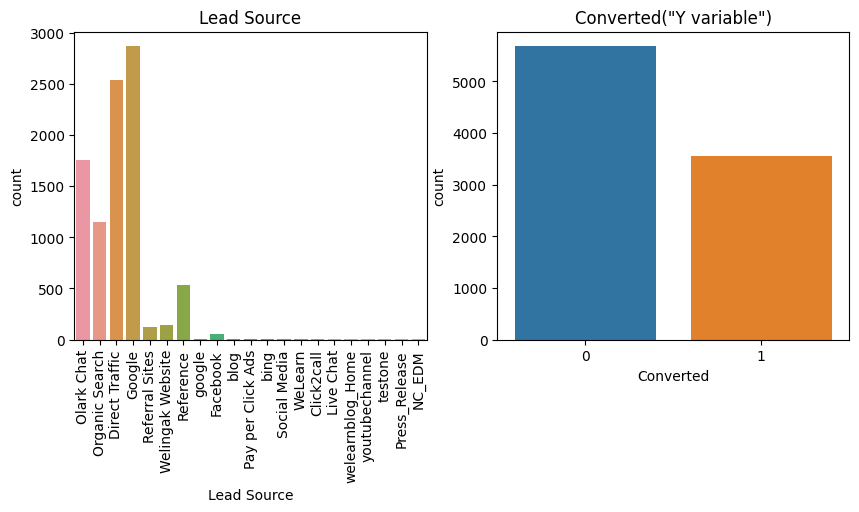

In [1394]:
# Ploting the categorical variable Lead Score & the Converted.

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.countplot(data = df, x= df['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(1,2,2)
sns.countplot(data = df, x= df['Converted'])
plt.title('Converted("Y variable")')

plt.show()

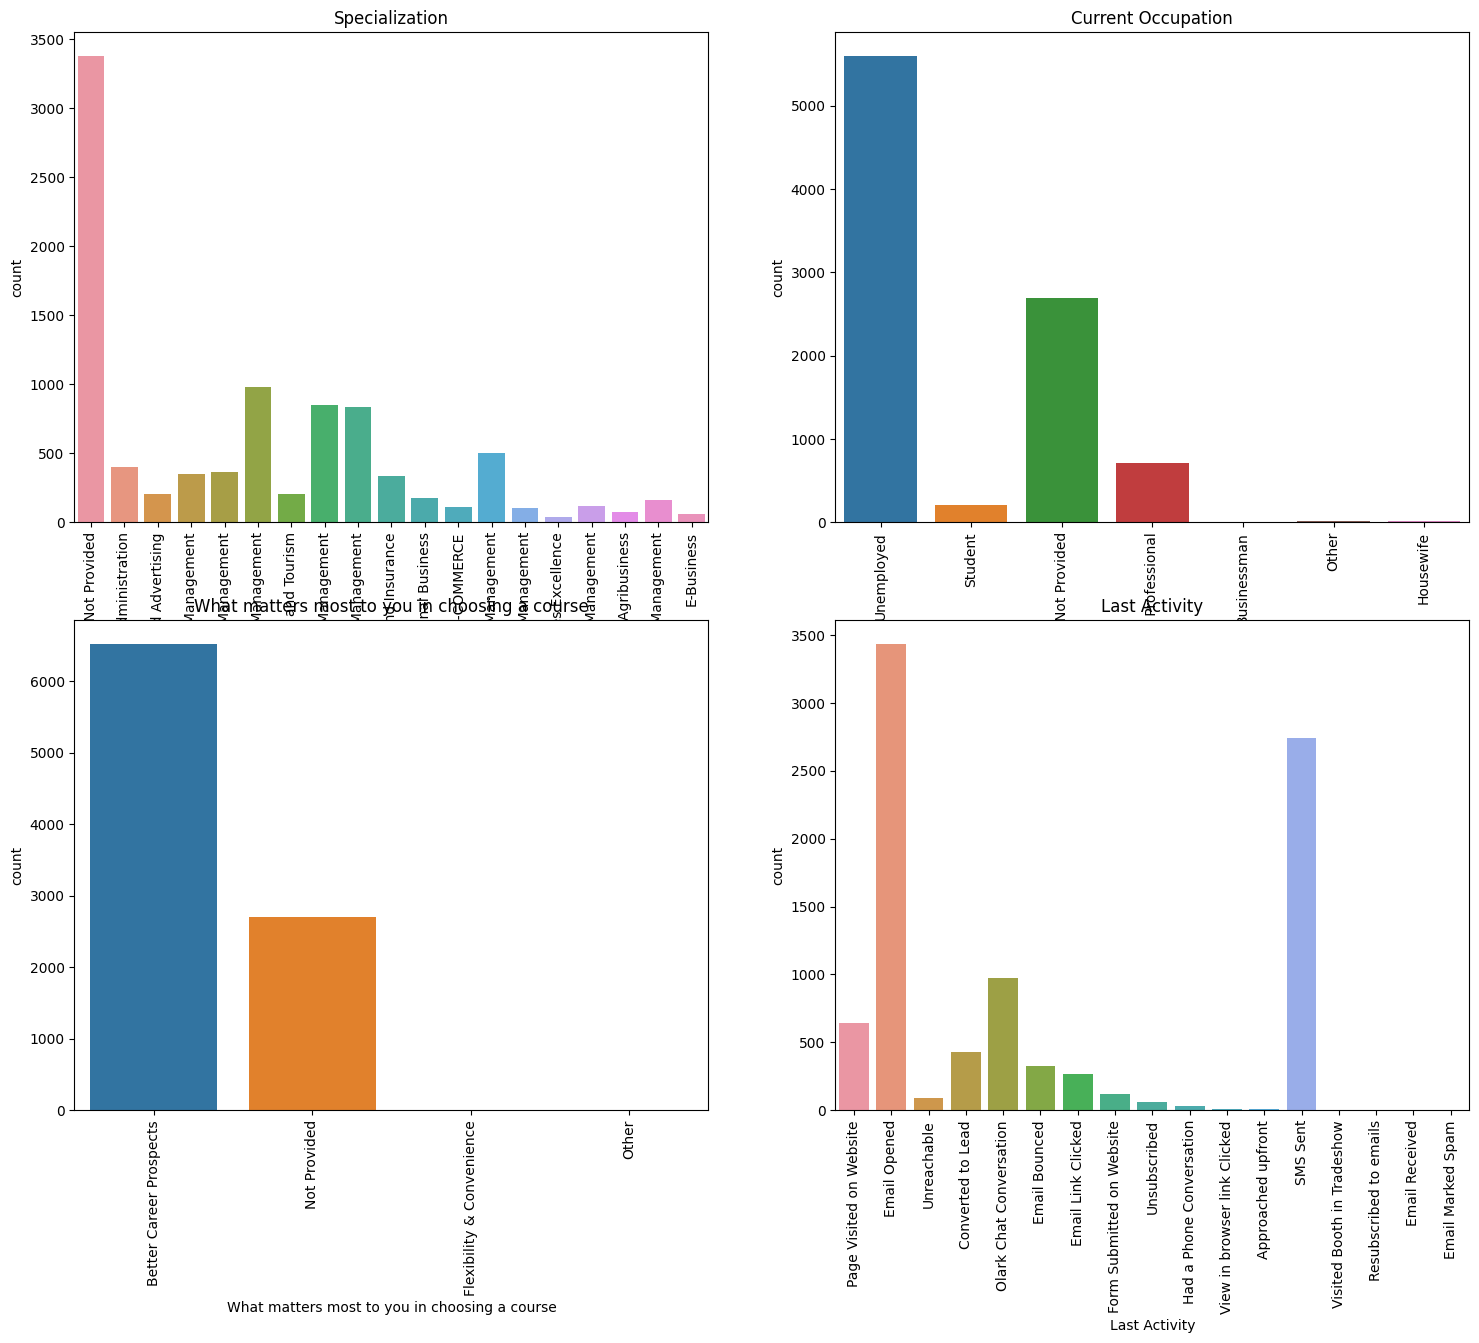

In [1395]:
# Ploting the few more categorical variables.

plt.figure(figsize = (18,14))

plt.subplot(2,2,1)
sns.countplot(data = df, x= df['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(2,2,2)
sns.countplot(data= df, x= df['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')

plt.subplot(2,2,3)
sns.countplot(data = df, x= df['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(2,2,4)
sns.countplot(data= df, x= df['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

### Numerical Attributs Analysis

(0.0, 20.0)

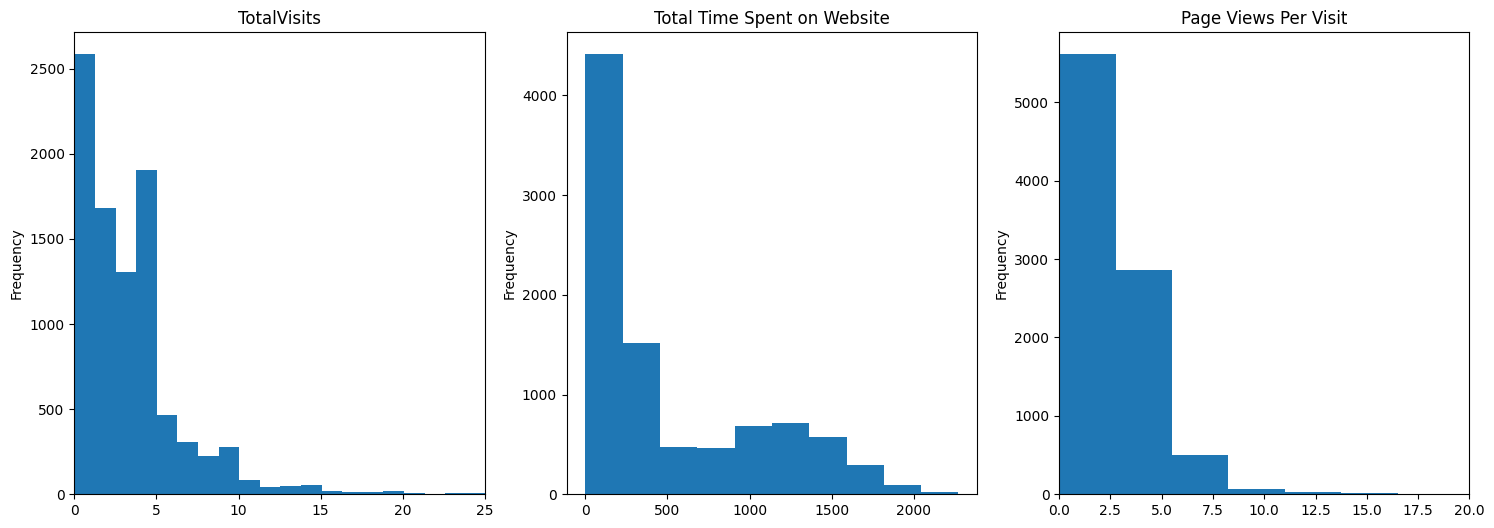

In [1396]:
# Checking the Numerical Attributes 

plt.figure(figsize=[18,6])
plt.subplot(1, 3, 1, title= 'TotalVisits')
df['TotalVisits'].plot.hist(bins = 200)
plt.xlim(0,25)

plt.subplot(1, 3, 2, title= 'Total Time Spent on Website')
df['Total Time Spent on Website'].plot.hist(bins=10)

plt.subplot(1, 3, 3, title= 'Page Views Per Visit')
df['Page Views Per Visit'].plot.hist(bins=20)
plt.xlim(0,20)

### Analyzeing all the categorical variables with the "Converted" the Y Variable.

- Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [1397]:
# Calculating the Lead Conversion Rate

LCR = (sum(df['Converted'])/len(df['Converted'].index))*100
round(LCR, 2)

38.54

- The Lead Converstion rate is 38.54%

In [1398]:
#Replacing Nan Values and combining low frequency values for Lead Source.

df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

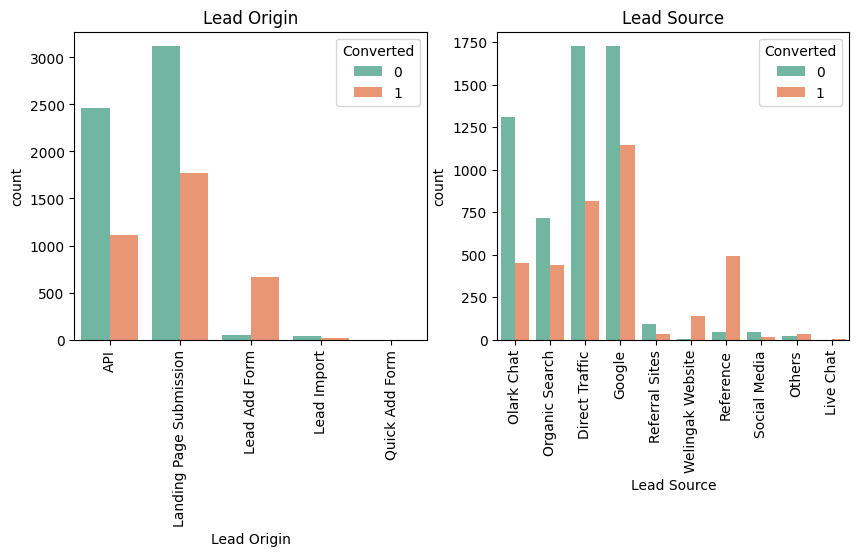

In [1399]:
#visualizing Lead Origin & Lead Source Variable based on Converted value

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df, palette='Set2').tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df, palette='Set2').tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

__Inference from Lead Origin__

1. API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
2. Lead Add Form has more than 90% conversion rate but count of lead are not very high.
3. Lead Import are very less in count.
4. Lead Import and Quick Add Form get very few leads

__Inference from Lead Source__

1. Maximum number of leads are generated by Google and Direct traffic.
2. Conversion Rate of reference leads and leads through welingak website is high.
3. To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

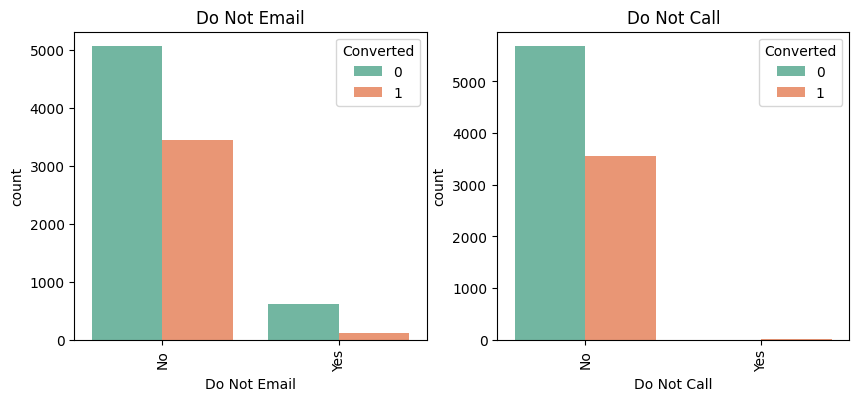

In [1400]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df, palette='Set2').tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df, palette='Set2').tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

__Inference__

- Most entries are 'No'. No Inference can be drawn with this parameter and can be removed this feature.

In [1401]:
#replacing Nan Values and combining low frequency values in Last Activity.

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

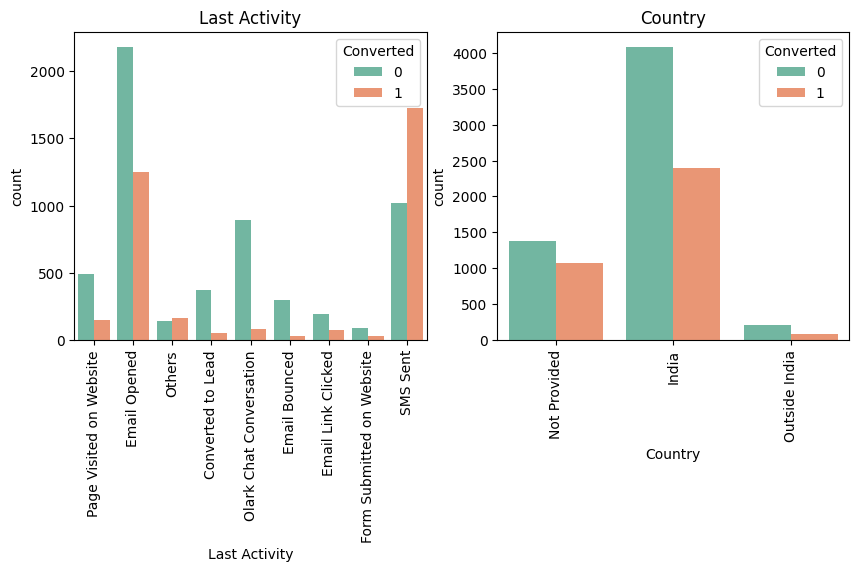

In [1402]:
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df, palette='Set2').tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= df, palette='Set2').tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

__Inference__

1. Most of the lead have their Email opened as their last activity.
2. Conversion rate for leads with last activity as SMS Sent is almost 60%.
3. For Country most are from India so no such inferances can be done.

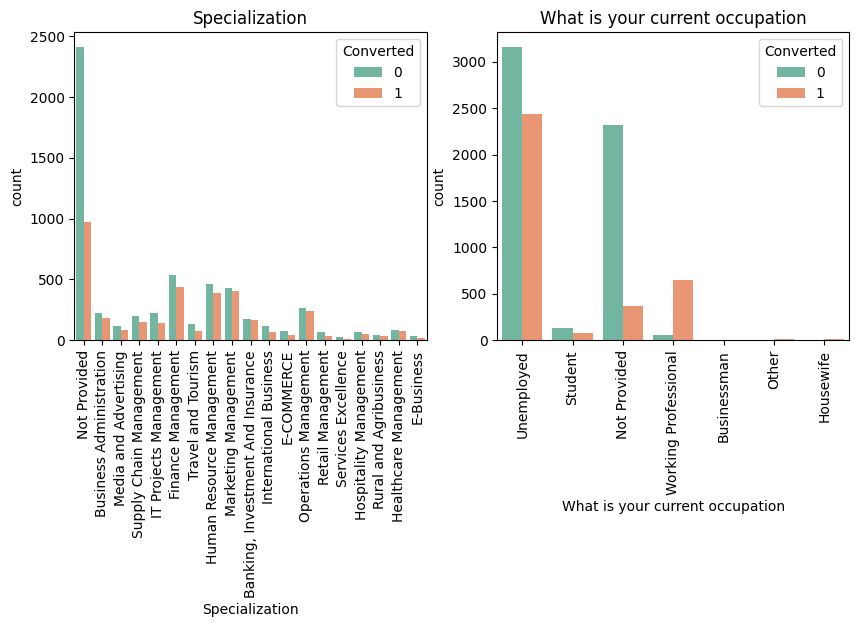

In [1403]:
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df, palette='Set2').tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df, palette='Set2').tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

**Inference**
- Focus should be more on the Specialization with high conversion rate.
- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in numbers.

We see that specialization with **Management** in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

In [1404]:
#combining Management Specializations because they show similar trends

df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                            'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

Text(0.5, 1.0, 'Specialization')

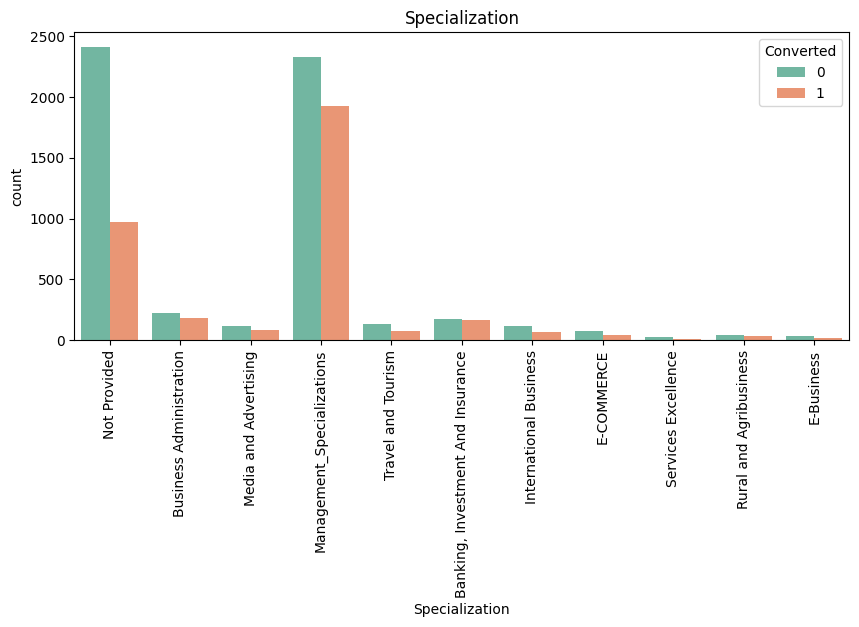

In [1405]:
#visualizing the Specialization again based on Converted value


plt.figure(figsize = (10,4))

sns.countplot(x='Specialization', hue='Converted', data= df, palette='Set2').tick_params(axis='x', rotation = 90)
plt.title('Specialization')

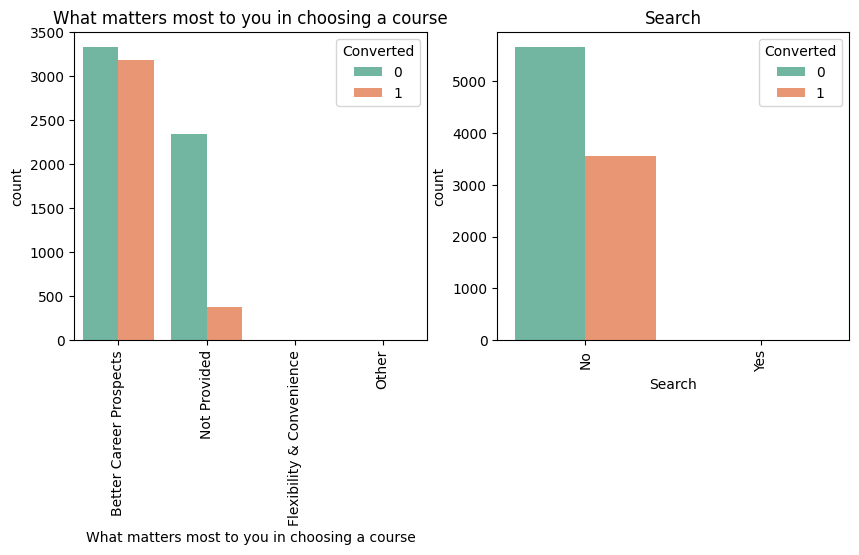

In [1406]:
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df, palette='Set2').tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df, palette='Set2').tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

We can see that Those highly skewed column so we can remove this column.

In [1407]:
#clubbing lower frequency values for Last Notable Activity

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

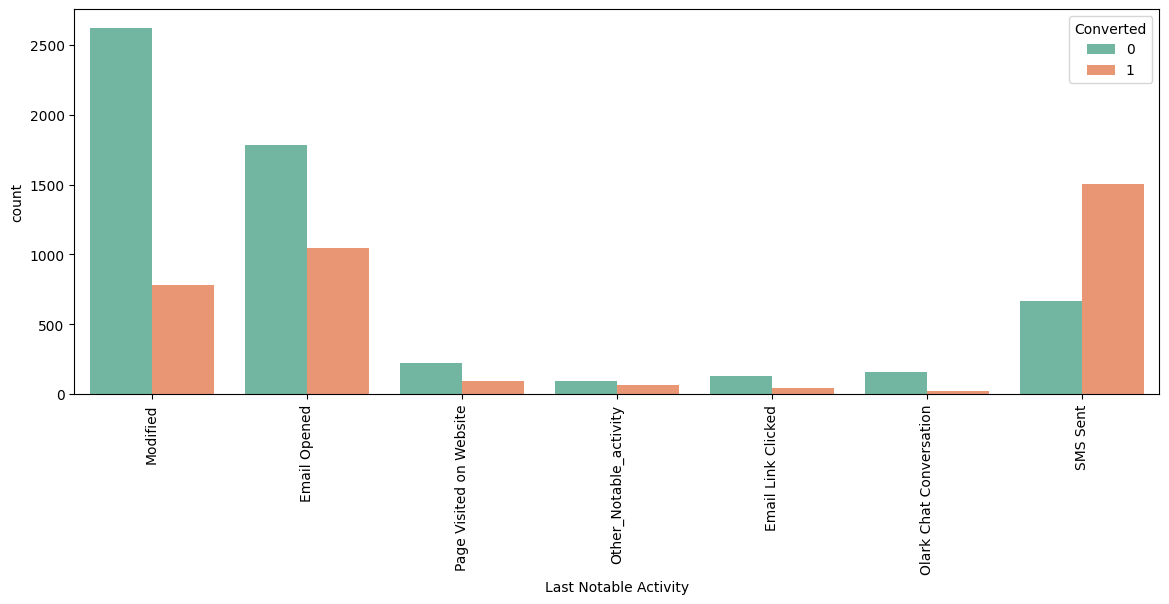

In [1408]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df, palette='Set2')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [1409]:
# Adding imbalanced columns to the list of columns to be dropped.
# Below are the list of column found to be imbalance and can not drawn any inferances hence dropping.

col_2_drop = ['Country','What matters most to you in choosing a course',
                'Do Not Call',
                'Search',
                'Magazine',
                'Newspaper Article',
                'X Education Forums',
                'Newspaper',
                'Digital Advertisement',
                'Through Recommendations',
                'Receive More Updates About Our Courses',
                'Update me on Supply Chain Content',
                'Get updates on DM Content',
                'I agree to pay the amount through cheque']

In [1410]:
#Dropping Imbalanced columns identied

df = df.drop(col_2_drop,1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

In [1411]:
# Checking the shape of the remaining Data.

df.shape

(9240, 14)

## Numerical Attributes Analysis:

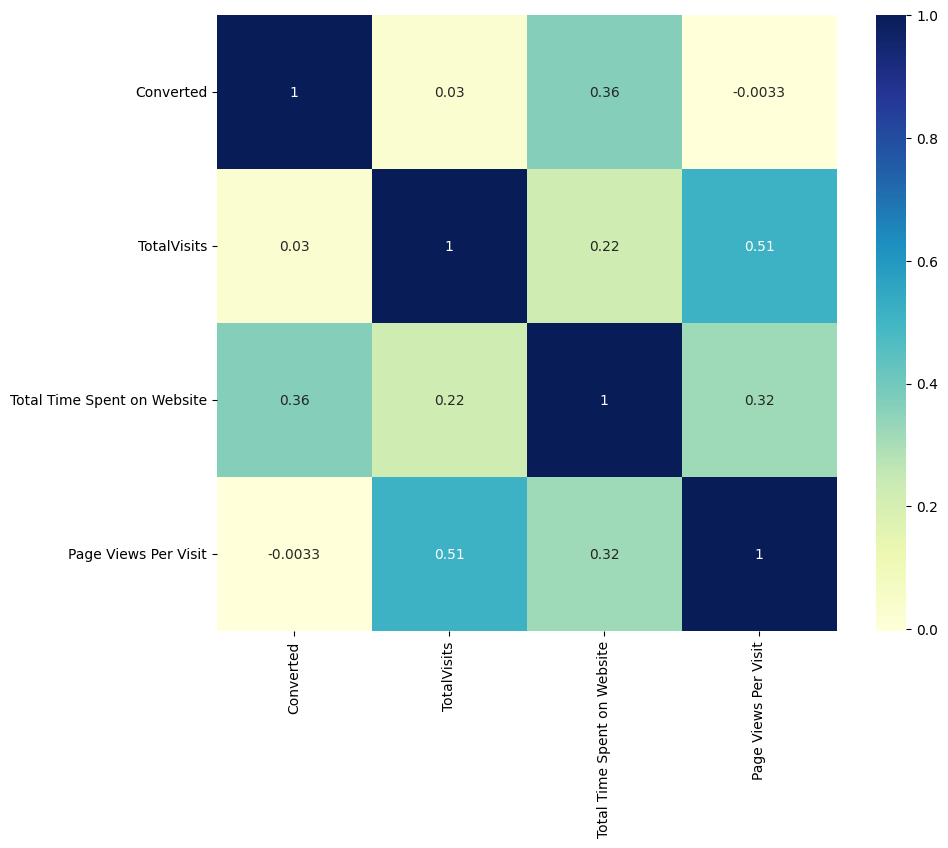

In [1412]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

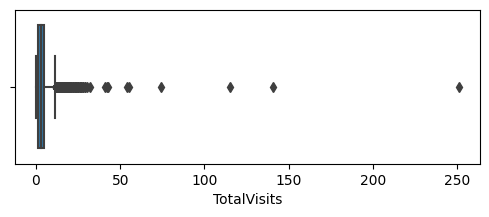

In [1413]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,2))
sns.boxplot(x=df['TotalVisits'])
plt.show()

There are Outliers observed so need to treet the outliers.

In [1414]:
#Checking the various percentile values for "Total Visits"

df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

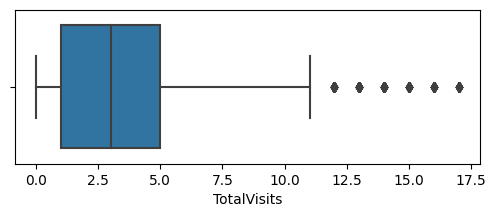

In [1415]:
#Remove top & bottom 1% of the Column Outlier values

Qt3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Qt3)]
Qt1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Qt1)]
plt.figure(figsize=(6,2))
sns.boxplot(x=df['TotalVisits'])
plt.show()

In [1416]:
#checking percentiles for "Total Time Spent on Website"

df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

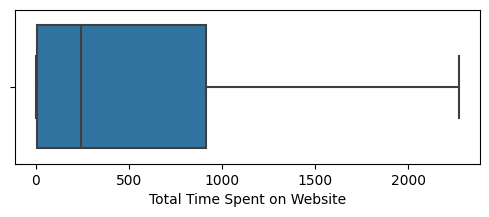

In [1417]:
#visualizing spread of numeric variable 'Total Time Spent on Website'

plt.figure(figsize=(6,2))
sns.boxplot(x=df['Total Time Spent on Website'])
plt.show()

No such outliers observed for this variable so no outlier treatmenet is not required here.

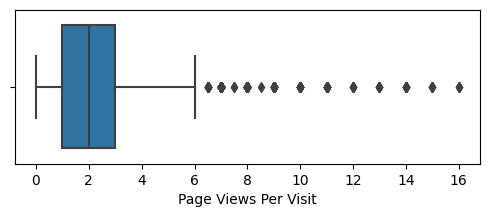

In [1418]:
#visualizing spread of numeric variable 'Page Views Per Visit'

plt.figure(figsize=(6,2))
sns.boxplot(x=df['Page Views Per Visit'])
plt.show()

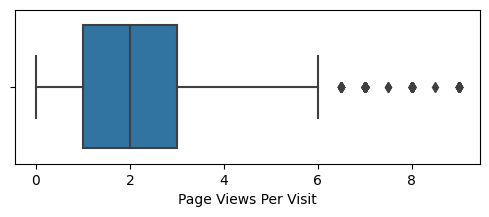

In [1419]:
#Remove top & bottom 1% to treat the outliers

Qt3 = df['Page Views Per Visit'].quantile(0.99)
df = df[df['Page Views Per Visit'] <= Qt3]
Qt1 = df['Page Views Per Visit'].quantile(0.01)
df = df[df['Page Views Per Visit'] >= Qt1]
plt.figure(figsize=(6,2))
sns.boxplot(x=df['Page Views Per Visit'])
plt.show()

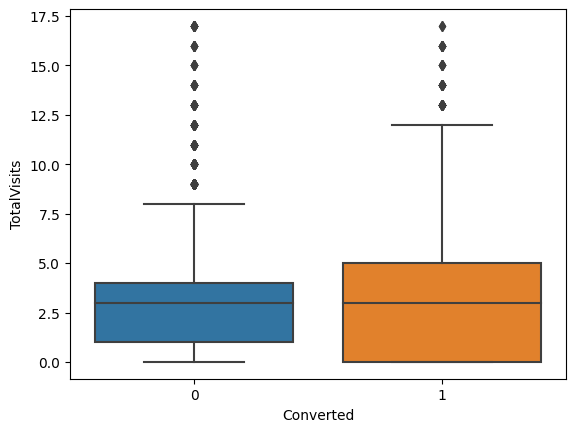

In [1420]:
#checking Spread of "Total Visits" vs Converted variable

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

__Inference__

1. Median for converted and not converted leads are the close.
2. Nothng conclusive can be said on the basis of Total Visits

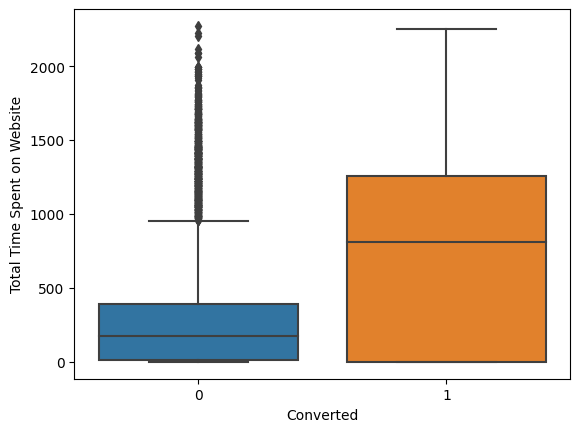

In [1421]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=df.Converted, y=df['Total Time Spent on Website'])
plt.show()

__Inference__

1. Leads spending more time on the website are more likely to be converted.
2. Website should be made more engaging to make leads spend more time.

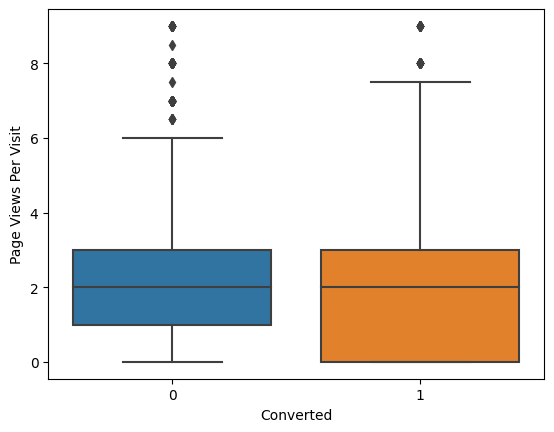

In [1422]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])
plt.show()

__Inference__

1. Median for converted and unconverted leads is the same.
2. Nothing can be said specifically for lead conversion from Page Views Per Visit

### Bivariate Analysis

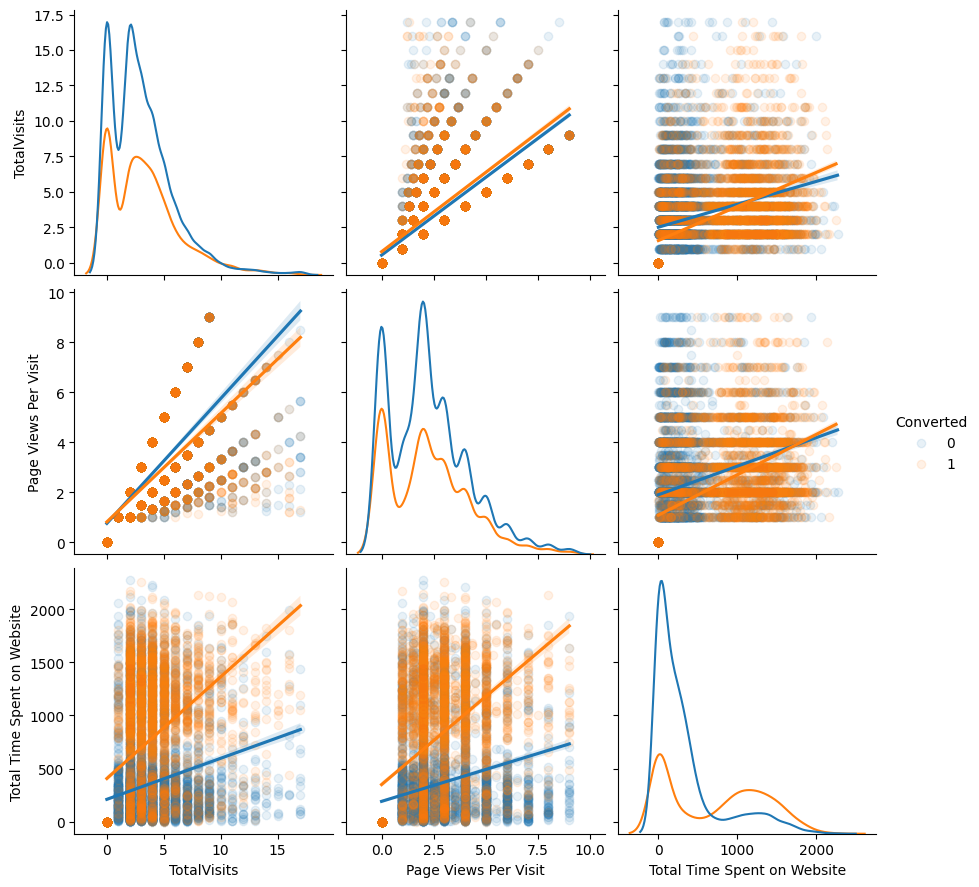

In [1423]:
# Bivariate Analysis after clening the data

num_df = df[['TotalVisits',  'Page Views Per Visit', 'Total Time Spent on Website']]

sns.pairplot(data=df, vars=num_df, hue='Converted', kind='reg', height=3,plot_kws={'scatter_kws': {'alpha': 0.1}}, diag_kws=dict(fill=False))
plt.show()

In [1424]:
#checking missing values in leftover columns/

round(100*(df.isnull().sum()/len(df.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

## Dummy Variable Creation for Categorical Feature

In [1425]:
#Getting a list of categorical columns

cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1426]:
# List of variables to map categorical variables

var_list =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_conv(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[var_list] = df[var_list].apply(binary_conv)

In [1427]:
# Creating a dummy variable for the categorical variables and dropping the first one.

dummy_df = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity',
                            'Specialization', 'What is your current occupation', 'Tags', 'City',
                            'Last Notable Activity']], drop_first=True)
dummy_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [1428]:
# Concatenating the dummy_df to the cleaned(df) dataframe

df = pd.concat([df, dummy_df], axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed,...,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,...,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Provided,Unemployed,...,0,0,0,0,0,1,0,0,0,0


### Dropping the columns for which dummies were created above.

In [1429]:
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity',
                'Specialization', 'What is your current occupation', 'Tags', 'City',
                'Last Notable Activity'], axis = 1)

In [1430]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


# Building the Predictive Model

#### Splitting into Train and Test & Importing the Logistic Regression Model

In [1431]:
# Importing the train_test_split from sklearn

from sklearn.model_selection import train_test_split

# Putting response variable to y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1432]:
# Putting the Features to x
X = df.drop('Converted', axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [1433]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1434]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 59 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6267 non-null   int64  
 1   TotalVisits                                           6267 non-null   float64
 2   Total Time Spent on Website                           6267 non-null   int64  
 3   Page Views Per Visit                                  6267 non-null   float64
 4   A free copy of Mastering The Interview                6267 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 7   Lead Origin_Lead Import                               6267 non-null   uint8  
 8   Lead Source_Google                                    6

### Scaling
Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables. We will perform Min Max scaling on the Continuous numerical variables

In [1435]:
# Import MinMax scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,-0.28572,0.668862,1.848117,1.455819,-0.667339,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4696,-0.28572,-0.030697,-0.037832,0.399961,-0.667339,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3274,-0.28572,0.319082,-0.642138,-0.127967,-0.667339,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2164,-0.28572,-0.380477,-0.154676,-0.127967,-0.667339,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1667,-0.28572,0.319082,1.258415,-0.481679,-0.667339,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


#### Looking at the correlations
Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

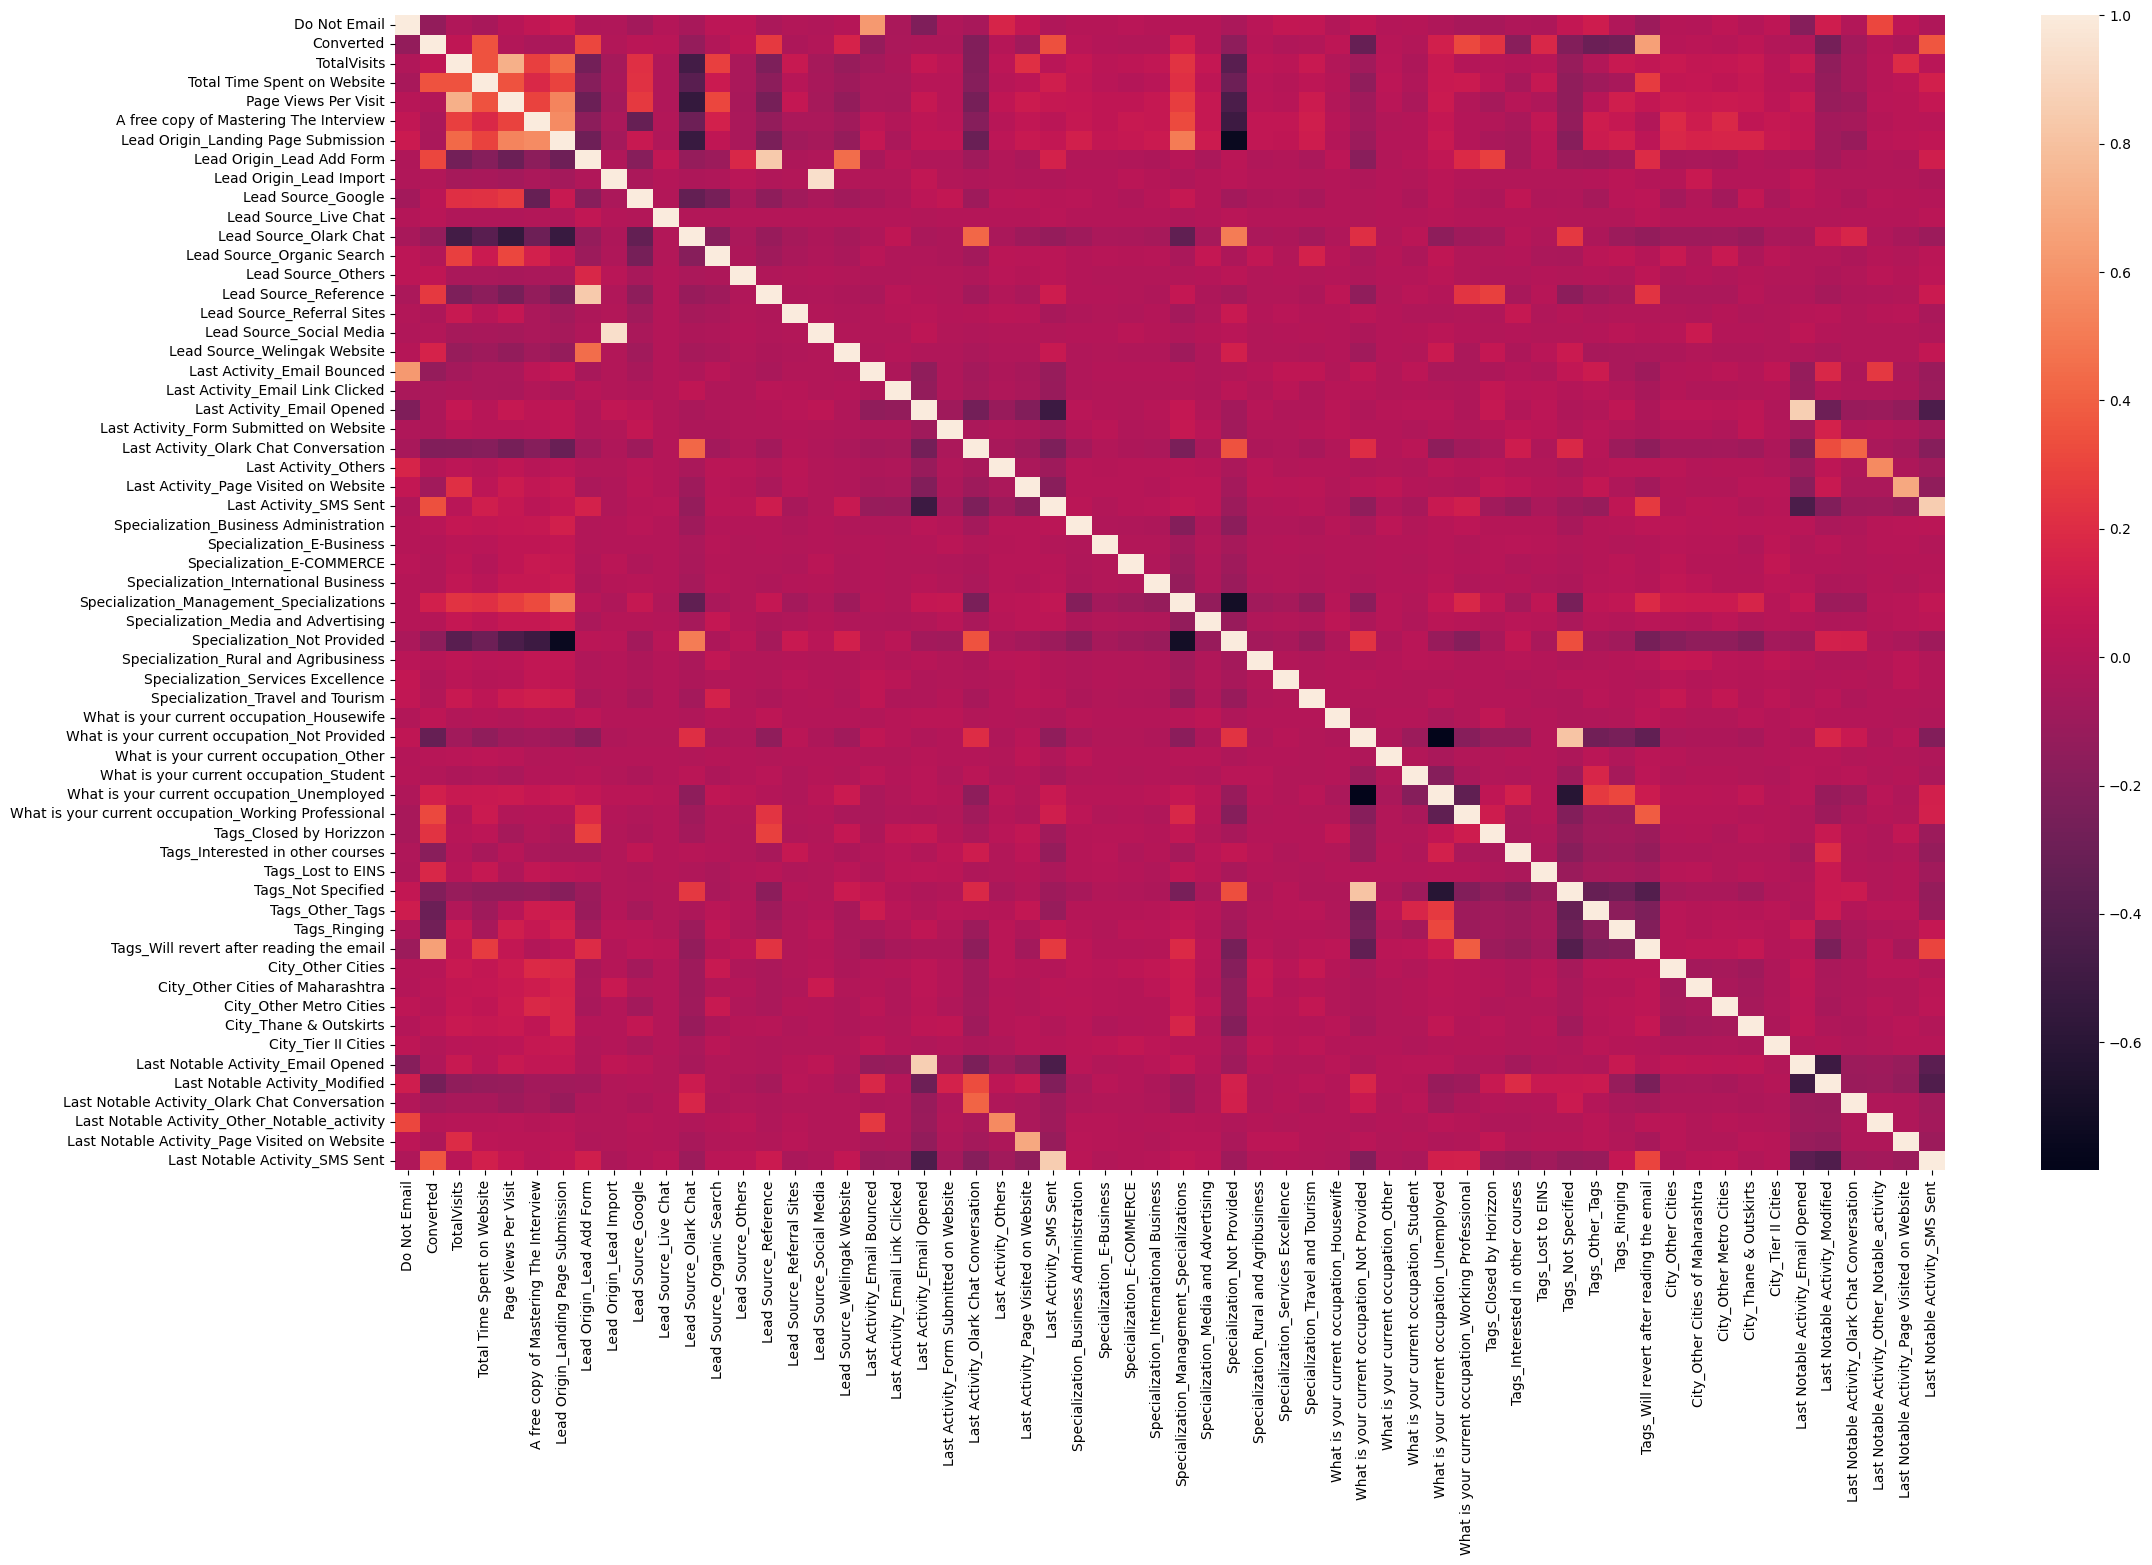

In [1436]:
# Looking at the correlation table

plt.figure(figsize = (25,15))
sns.heatmap(df.corr())
plt.show()


# Model Building using Stats Model & RFE:

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

#### Feature Selection Using RFE

In [1437]:
# Importing the stats model
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [1438]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 20),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('A free copy of Mastering The Interview', False, 29),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 31),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Others', False, 7),
 ('Lead Source_Reference', False, 33),
 ('Lead Source_Referral Sites', False, 38),
 ('Lead Source_Social Media', False, 18),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 2),
 ('Last Activity_Email Link Clicked', False, 37),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 10),
 ('Last Activity_Olark Chat Conversation', False, 5),
 ('Last Activity_Others', False, 19),
 ('Last Activity_Page Vi

In [1439]:
#list of RFE supported columns

rfe_fet = X_train.columns[rfe.support_]
rfe_fet

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'What is your current occupation_Not Provided',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Other_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

## Model: 1

In [1440]:
# Building Model 1

X_train_sm = sm.add_constant(X_train[rfe_fet])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1109.2
Date:                Fri, 30 Dec 2022   Deviance:                       2218.4
Time:                        13:53:29   Pearson chi2:                 7.54e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6227
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.7227      0.175     -9.864      0.000      -2.065      -1.380
Total Time Spent on Website                      1.0660      0.064     16.641      0.000       0.940       1.192
Lead Origin_Lead Add Form                        1.8763      0.463      4.056      0.000       0.970       2.783
Lead Source_Olark Chat                           1.1558      0.157      7.366      0.000       0.848       1.463
Lead Source_Welingak Website                     3.0033      1.120      2.683      0.007       0.809       5.198
Last Activity_Email Opened                       1.4212      0.161      8.823      0.000       1.105       1.737
Last Activity_SMS Sent                           1.7596      0.245      7.183      0.000       1.279       2.240
What is your current occupation_Not Provided    -2.1626      0.140    -15.398      0.000      -2.438      -1.887
Tags_Closed by Horizzon                          5.4224      1.024      5.293      0.000       3.415       7.430
Tags_Interested in other courses                -3.6662      0.415     -8.840      0.000      -4.479      -2.853
Tags_Lost to EINS                                4.7518      0.617      7.700      0.000       3.542       5.961
Tags_Other_Tags                                 -3.8450      0.233    -16.515      0.000      -4.301      -3.389
Tags_Ringing                                    -4.9189      0.265    -18.589      0.000      -5.438      -4.400
Tags_Will revert after reading the email         3.1090      0.207     14.993      0.000       2.703       3.515
Last Notable Activity_Other_Notable_activity     1.3990      0.383      3.648      0.000       0.647       2.151
Last Notable Activity_SMS Sent                   1.8612      0.229      8.125      0.000       1.412       2.310
================================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [1441]:
# Function to calculate VIF of variables

def Calculate_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [1442]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1443]:
# Checking for the VIF values of the feature variables.
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

Calculate_VIF(X_train[rfe_fet])

,Features,VIF
5,Last Activity_SMS Sent,5.83
14,Last Notable Activity_SMS Sent,5.24
12,Tags_Will revert after reading the email,2.01
4,Last Activity_Email Opened,1.96
1,Lead Origin_Lead Add Form,1.86
6,What is your current occupation_Not Provided,1.62
2,Lead Source_Olark Chat,1.51
0,Total Time Spent on Website,1.45
3,Lead Source_Welingak Website,1.36
11,Tags_Ringing,1.36


VIFs seem to be in a decent range except for three variables.

Let's first drop the variable 'Last Activity_SMS Sent' since it has a high VIF.

In [1444]:
#dropping column with high VIF

rfe_fet = rfe_fet.drop('Last Activity_SMS Sent',1)

## Model: 2

In [1445]:
# Building Model 2

X_train_sm = sm.add_constant(X_train[rfe_fet])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1133.7
Date:                Fri, 30 Dec 2022   Deviance:                       2267.4
Time:                        13:53:29   Pearson chi2:                 7.90e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6197
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.2771      0.155     -8.252      0.000      -1.580      -0.974
Total Time Spent on Website                      1.0667      0.064     16.719      0.000       0.942       1.192
Lead Origin_Lead Add Form                        2.0212      0.447      4.521      0.000       1.145       2.897
Lead Source_Olark Chat                           1.0652      0.154      6.927      0.000       0.764       1.367
Lead Source_Welingak Website                     2.9759      1.112      2.677      0.007       0.797       5.155
Last Activity_Email Opened                       0.9799      0.140      7.022      0.000       0.706       1.253
What is your current occupation_Not Provided    -2.1015      0.138    -15.273      0.000      -2.371      -1.832
Tags_Closed by Horizzon                          5.2811      1.020      5.177      0.000       3.282       7.280
Tags_Interested in other courses                -3.6951      0.411     -9.001      0.000      -4.500      -2.890
Tags_Lost to EINS                                4.6849      0.618      7.585      0.000       3.474       5.896
Tags_Other_Tags                                 -3.8322      0.231    -16.593      0.000      -4.285      -3.380
Tags_Ringing                                    -4.8920      0.264    -18.525      0.000      -5.410      -4.374
Tags_Will revert after reading the email         3.0420      0.203     15.001      0.000       2.645       3.439
Last Notable Activity_Other_Notable_activity     0.9574      0.372      2.571      0.010       0.228       1.687
Last Notable Activity_SMS Sent                   3.1561      0.162     19.480      0.000       2.839       3.474
================================================================================================================
"""

In [1446]:
# Checking for the VIF values of the feature variables.
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

Calculate_VIF(X_train[rfe_fet])

,Features,VIF
11,Tags_Will revert after reading the email,1.91
1,Lead Origin_Lead Add Form,1.85
4,Last Activity_Email Opened,1.84
13,Last Notable Activity_SMS Sent,1.73
2,Lead Source_Olark Chat,1.51
5,What is your current occupation_Not Provided,1.47
0,Total Time Spent on Website,1.45
3,Lead Source_Welingak Website,1.35
10,Tags_Ringing,1.31
6,Tags_Closed by Horizzon,1.20


The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with __'Last Notable Activity_Other_Notable_activity'.__

In [1447]:
#dropping variable with high p-value

rfe_fet = rfe_fet.drop('Last Notable Activity_Other_Notable_activity',1)

## Model: 3

In [1448]:
# Building Model 3

X_train_sm = sm.add_constant(X_train[rfe_fet])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1136.9
Date:                Fri, 30 Dec 2022   Deviance:                       2273.7
Time:                        13:53:30   Pearson chi2:                 7.86e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6193
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.1930      0.151     -7.926      0.000      -1.488      -0.898
Total Time Spent on Website                      1.0634      0.064     16.682      0.000       0.938       1.188
Lead Origin_Lead Add Form                        2.0156      0.447      4.514      0.000       1.140       2.891
Lead Source_Olark Chat                           1.0487      0.153      6.839      0.000       0.748       1.349
Lead Source_Welingak Website                     2.9752      1.111      2.678      0.007       0.797       5.153
Last Activity_Email Opened                       0.9061      0.136      6.682      0.000       0.640       1.172
What is your current occupation_Not Provided    -2.1124      0.138    -15.356      0.000      -2.382      -1.843
Tags_Closed by Horizzon                          5.2530      1.020      5.151      0.000       3.254       7.252
Tags_Interested in other courses                -3.7011      0.409     -9.041      0.000      -4.504      -2.899
Tags_Lost to EINS                                4.6706      0.618      7.558      0.000       3.459       5.882
Tags_Other_Tags                                 -3.8392      0.231    -16.623      0.000      -4.292      -3.387
Tags_Ringing                                    -4.8986      0.264    -18.550      0.000      -5.416      -4.381
Tags_Will revert after reading the email         3.0476      0.203     15.023      0.000       2.650       3.445
Last Notable Activity_SMS Sent                   3.0827      0.158     19.466      0.000       2.772       3.393
================================================================================================================
"""

In [1449]:
# Checking for the VIF values of the feature variables.
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

Calculate_VIF(X_train[rfe_fet])

,Features,VIF
11,Tags_Will revert after reading the email,1.87
1,Lead Origin_Lead Add Form,1.85
4,Last Activity_Email Opened,1.80
12,Last Notable Activity_SMS Sent,1.71
2,Lead Source_Olark Chat,1.51
5,What is your current occupation_Not Provided,1.45
0,Total Time Spent on Website,1.44
3,Lead Source_Welingak Website,1.35
10,Tags_Ringing,1.30
6,Tags_Closed by Horizzon,1.20


So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

## Model Evaluation

In [1450]:
# Getting the Predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.260484
4696    0.045259
3274    0.287914
2164    0.006314
1667    0.983681
7024    0.458656
8018    0.039763
778     0.018022
6942    0.007311
4440    0.059965
dtype: float64

In [1451]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26048421, 0.04525897, 0.28791362, 0.00631433, 0.9836811 ,
       0.45865622, 0.0397632 , 0.01802188, 0.00731106, 0.05996472])

In [1452]:
# Creating a new dataset and saving predicted values in it

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.260484,9196
1,0,0.045259,4696
2,0,0.287914,3274
3,0,0.006314,2164
4,1,0.983681,1667


In [1453]:
#Creating new column 'predicted' with 1 if Lead_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.260484,9196,0
1,0,0.045259,4696,0
2,0,0.287914,3274,0
3,0,0.006314,2164,0
4,1,0.983681,1667,1


In [1454]:
#assigning lead score [Lead score = 100*(probability of converted)]

y_train_pred_final['lead_score']= y_train_pred_final.Converted_prob.map(lambda x: x*100)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,lead_score
0,1,0.260484,9196,0,26.048421
1,0,0.045259,4696,0,4.525897
2,0,0.287914,3274,0,28.791362
3,0,0.006314,2164,0,0.631433
4,1,0.983681,1667,1,98.368110


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

#### Creating the Confusion matrix

In [1455]:
from sklearn import metrics

# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3753  129]
 [ 286 2099]]


The confusion matrix indicates as below
 Predicted     not_converted    converted
 Actual
 not_converted        3753      129
 converted            286       2099  

In [1456]:
# Let's check the overall accuracy.

print('Accuracy :', round((metrics.accuracy_score(y_train_pred_final.Converted, 
                                                    y_train_pred_final.Predicted))*100,3))

Accuracy : 93.378


#### Metrics beyond simply accuracy

In [1457]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1458]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity : ',round(TP / float(TP+FN),2))

Sensitivity :  0.88


In [1459]:
# Let us calculate specificity
print('Specificity : ',round(TN / float(TN+FP),2))

Specificity :  0.97


In [1460]:
# Calculate False Postive Rate - predicting conversion when customer does not convert
print('False Positive Rate :', round(FP/ float(TN+FP),2))

False Positive Rate : 0.03


In [1461]:
# positive predictive value 
print("Positive Predictive Value :",round(TP / float(TP+FP),2))

Positive Predictive Value : 0.94


In [1462]:
# Negative predictive value
print("Negative predictive value :",round(TN / float(TN+ FN),2))

Negative predictive value : 0.93


We found out that our specificity is good (~97%) but our sensitivity is 88%. Hence, this needed to be taken care of.
We have got sensitivity of 88% and this is mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve. Lets verify the cutoff point using the ROC Curve.

## ROC CURVE

#### Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1463]:
# Function to for ROC

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1464]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                             y_train_pred_final.Converted_prob, 
                                             drop_intermediate = False )

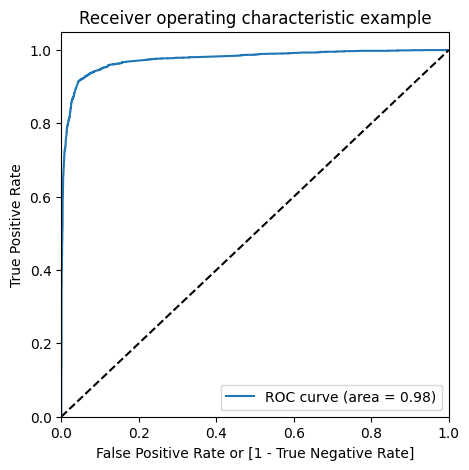

In [1465]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.98 indicating a good predictive model.

**Finding Optimal Cutoff Point**
Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.

In [1466]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,lead_score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.260484,9196,0,26.048421,1,1,1,0,0,0,0,0,0,0
1,0,0.045259,4696,0,4.525897,1,0,0,0,0,0,0,0,0,0
2,0,0.287914,3274,0,28.791362,1,1,1,0,0,0,0,0,0,0
3,0,0.006314,2164,0,0.631433,1,0,0,0,0,0,0,0,0,0
4,1,0.983681,1667,1,98.368110,1,1,1,1,1,1,1,1,1,1


In [1467]:
# Let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.887346  0.967296  0.838228
0.2   0.2  0.915111  0.950943  0.893096
0.3   0.3  0.930748  0.933333  0.929160
0.4   0.4  0.938408  0.918658  0.950541
0.5   0.5  0.933780  0.880084  0.966770
0.6   0.6  0.931067  0.866667  0.970634
0.7   0.7  0.927078  0.850314  0.974240
0.8   0.8  0.916228  0.812159  0.980165
0.9   0.9  0.890538  0.727044  0.990984


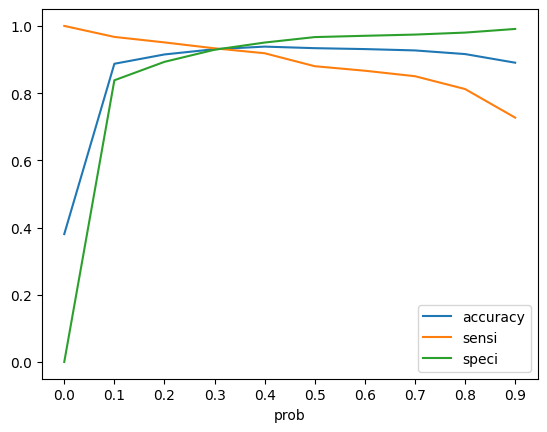

In [1468]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, 0.1))
plt.show()

In [1469]:
#### From the curve above, 0.32 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.32 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,lead_score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.260484,9196,0,26.048421,1,1,1,0,0,0,0,0,0,0,0
1,0,0.045259,4696,0,4.525897,1,0,0,0,0,0,0,0,0,0,0
2,0,0.287914,3274,0,28.791362,1,1,1,0,0,0,0,0,0,0,0
3,0,0.006314,2164,0,0.631433,1,0,0,0,0,0,0,0,0,0,0
4,1,0.983681,1667,1,98.368110,1,1,1,1,1,1,1,1,1,1,1


In [1470]:
# Assigning Lead Score to the Training data

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.260484,9196,0,26
1,0,0.045259,4696,0,5
2,0,0.287914,3274,0,29
3,0,0.006314,2164,0,1
4,1,0.983681,1667,1,98


In [1471]:
# Let's check the overall accuracy.

print('Accuracy :', round((metrics.accuracy_score(y_train_pred_final.Converted, 
                                                    y_train_pred_final.Predicted))*100,3))

Accuracy : 93.378


In [1472]:
# Confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3628,  254],
       [ 166, 2219]], dtype=int64)

In [1473]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1474]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity : ',round((TP / float(TP+FN))*100,2))

# Let us calculate specificity
print('Specificity : ',round((TN / float(TN+FP))*100,2))

# Calculate False Postive Rate - predicting conversion when customer does not convert
print('False Positive Rate :', round(FP/ float(TN+FP),2))

# positive predictive value 
print("Positive Predictive Value :",round(TP / float(TP+FP),2))

# Negative predictive value
print("Negative predictive value :",round(TN / float(TN+ FN),2))

Sensitivity :  93.04
Specificity :  93.46
False Positive Rate : 0.07
Positive Predictive Value : 0.9
Negative predictive value : 0.96


**Observation:**

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.98, which is very good. We have the following values for the Train Data:

- Accuracy    : 93.378%
- Sensitivity : 93.04%
- Specificity : 93.46%

Some of the other Stats are derived below indicating the Precision & Recall.

#### Precision and Recall

- **Precision** = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
- **Recall** = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [1475]:
# Precision
TP / TP + FP

print("Precision : ",round((confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])*100),2))

# Recall
TP / TP + FN

print("Recall :",round((confusion2[1,1]/(confusion2[1,0]+confusion2[1,1]))*100,2))

Precision :  89.73
Recall : 93.04


#### Using sklearn utilities for the same

In [1476]:
from sklearn.metrics import precision_score, recall_score

print("Precision :",round((precision_score(y_train_pred_final.Converted , 
                                            y_train_pred_final.final_Predicted))*100, 2))
print("Recall :",round((recall_score(y_train_pred_final.Converted, 
                                        y_train_pred_final.final_Predicted))*100,2))

Precision : 89.73
Recall : 93.04


#### Precision and recall tradeof

In [1477]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, 
                                            y_train_pred_final.Converted_prob)

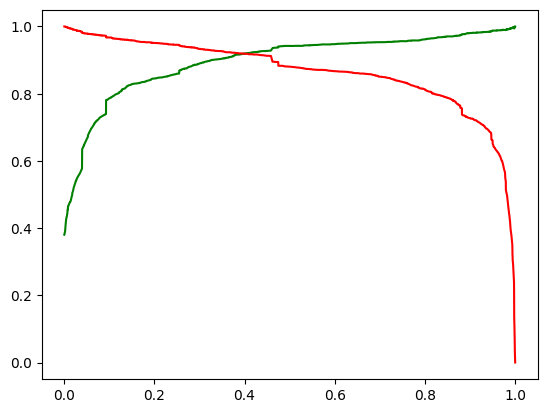

In [1478]:
# plotting a trade-off curve between precision and recall

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making predictions on the test set

#### Scaling the Test data

In [1479]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7681,-0.301634,0.575687,-0.311318,0.092860,1.448461,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
984,-0.301634,-0.090676,-0.550262,0.356568,1.448461,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8135,3.315278,-0.423857,0.812462,-0.170849,1.448461,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6915,-0.301634,0.242505,-0.628665,-0.170849,1.448461,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
2712,-0.301634,-0.090676,-0.421456,0.356568,-0.690388,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [1480]:
# Assigning the columns selected by the final model to the X_test 

X_test = X_test[rfe_fet]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,What is your current occupation_Not Provided,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
7681,-0.311318,0,0,0,0,0,0,0,0,0,1,0,1
984,-0.550262,0,0,0,0,0,0,0,0,1,0,0,0
8135,0.812462,0,0,0,0,1,0,0,0,0,0,0,1
6915,-0.628665,0,0,0,1,0,0,0,0,0,1,0,0
2712,-0.421456,0,0,0,1,0,0,0,0,0,0,1,0


In [1481]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

7681    0.034228
984     0.003621
8135    0.655056
6915    0.002860
2712    0.909910
244     0.002841
4698    0.002772
8287    0.038971
6791    0.969644
8970    0.005468
dtype: float64

In [1482]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's check the head of the data
y_pred_1.head()

,0
7681,0.034228
984,0.003621
8135,0.655056
6915,0.002860
2712,0.909910


In [1483]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [1484]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [1485]:
# Removing index for both dataframes to append them side by side.

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1486]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.034228
1,0,984,0.003621
2,0,8135,0.655056
3,0,6915,0.002860
4,1,2712,0.909910


In [1487]:
# Renaming the column

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.034228
1,0,984,0.003621
2,0,8135,0.655056
3,0,6915,0.002860
4,1,2712,0.909910


In [1488]:
# Rearranging the columns

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.034228,3
1,984,0,0.003621,0
2,8135,0,0.655056,66
3,6915,0,0.002860,0
4,2712,1,0.909910,91


In [1489]:
# Makeing predictions on the test set using 0.32 as the cutoff

y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.32 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.034228,3,0
1,984,0,0.003621,0,0
2,8135,0,0.655056,66,1
3,6915,0,0.002860,0,0
4,2712,1,0.909910,91,1


In [1490]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9411764705882353

In [1491]:
# Let's check the overall accuracy.

print('Accuracy :', round((metrics.accuracy_score(y_pred_final.Converted, 
                                                    y_pred_final.final_Predicted))*100,3))

Accuracy : 94.118


In [1492]:
# Confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, 
                                        y_pred_final.final_Predicted )
confusion2

array([[1581,   95],
       [  63,  947]], dtype=int64)

In [1493]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1494]:
print("Precision :",round((precision_score(y_pred_final.Converted , 
                                                y_pred_final.final_Predicted))*100,2))
print("Recall :",round((recall_score(y_pred_final.Converted, 
                                                y_pred_final.final_Predicted))*100,2))

Precision : 90.88
Recall : 93.76


In [1495]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity : ',round((TP / float(TP+FN))*100,2))

# Let us calculate specificity
print('Specificity : ',round((TN / float(TN+FP))*100,2))

# Calculate False Postive Rate - predicting conversion when customer does not convert
print('False Positive Rate :', round(FP/ float(TN+FP),2))

# positive predictive value 
print("Positive Predictive Value :",round(TP / float(TP+FP),2))

# Negative predictive value
print("Negative predictive value :",round(TN / float(TN+ FN),2))

Sensitivity :  93.76
Specificity :  94.33
False Positive Rate : 0.06
Positive Predictive Value : 0.91
Negative predictive value : 0.96


**Observation:**
After running the model on the Test Data these are the figures we obtain:

- Accuracy : 94.118%
- Sensitivity : 93.76%
- Specificity : 94.33%

# <font color = royalblue> Observed Results </font>

#### Comparision between Training and Testing dataset:

Let us compare the values obtained for Train & Test:

__Train Data:__

- Accuracy    : 93.378%
- Sensitivity : 93.04%
- Specificity : 93.46%

__Test Data:__

- Accuracy : 94.118%
- Sensitivity : 93.76%
- Specificity : 94.33%

Thus we have achieved our goal of getting the target lead conversion rate to be around 94% . The Model seems to predict the Conversion Rate prety well and we should be able to give the CEO confidence in making good deceission based on this model to get a higher lead conversion rate of ~90%.

#### Finding out the leads which should be contacted:
The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [1496]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
4,2712,1,0.909910,91,1
8,6791,1,0.969644,97,1
12,1026,1,0.985490,99,1
13,5167,1,0.998296,100,1
15,5391,1,0.982935,98,1


In [1497]:
hot_leads.shape

(839, 5)

So there are 838 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :

In [1498]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([2712, 6791, 1026, 5167, 5391, 8650, 4683, 1594, 1927, 1509, 5036,
       3268, 1311, 5051, 7840, 2709, 7051, 2521, 9020, 3511, 4769, 5649,
       4965, 6984, 1003, 8977, 3249, 4890, 2853, 2159, 2617, 5769, 7888,
       7268,   75, 2623, 8409,  216, 5373, 2562, 8625, 4674, 2392, 7989,
       7438,  943,  777, 6197,  568, 4612, 7536,  973, 1932, 4331, 3616,
       7707, 8228, 2657, 3412, 1950, 7523, 1643, 4259, 2570,   82,  460,
       7329, 5747, 1332, 5000, 4646, 2703, 4634, 3095, 5827, 7470, 6230,
       5061, 3307, 3465, 8588,  187, 8749, 9037, 4793, 7895, 4803, 7126,
       5753, 6843, 3781, 5474, 6816, 5662, 5752, 5096, 1805, 1549, 3123,
       2042, 1404, 6711, 1573, 3120, 2118, 1056,   22, 4977, 8243, 9197,
       1586, 2243, 8980, 4132, 2984, 4782, 4788, 5071, 1157, 5506, 4320,
       4061, 1867, 5194, 4398, 3695, 6698, 1809, 2014, 3839, 8966, 6294,
       5035,  225, 5205,  807, 7570, 7150, 5206, 2444, 8370, 4816, 7814,
       5860, 5719, 2357, 8583, 1510, 9107,  320, 69

#### Finding out the Important Features from our final model:

In [1499]:
res.params.sort_values(ascending=False)

Tags_Closed by Horizzon                         5.253033
Tags_Lost to EINS                               4.670573
Last Notable Activity_SMS Sent                  3.082736
Tags_Will revert after reading the email        3.047650
Lead Source_Welingak Website                    2.975169
Lead Origin_Lead Add Form                       2.015617
Total Time Spent on Website                     1.063436
Lead Source_Olark Chat                          1.048668
Last Activity_Email Opened                      0.906056
const                                          -1.192973
What is your current occupation_Not Provided   -2.112429
Tags_Interested in other courses               -3.701138
Tags_Other_Tags                                -3.839219
Tags_Ringing                                   -4.898571
dtype: float64

# <font color = royalblue> Recommendations:

* The company **should make calls** to the leads coming from the `Tags`  having `"Closed by Horizzon", "Lost to EINS" & "Will revert after reading the email"` as these are more likely to get converted.
* The company **should make calls** to the leads coming from the `lead sources "Welingak Websites"`  and `"Olark Chat"` as these are more likely to get converted.
* The company **should make calls** to the leads who are the `"working professionals"` as they are more likely to get converted and Avoid calling who have `"not provided their Current Occupation"`.
* The company **should make calls** to the leads whose `Last Notable Activity` was `SMS Sent` as they are more likely to get converted.
* The company **should make calls** to the leads who spent `"Total Time Spent on Website"` as these are more likely to get converted.
* The company **should make calls** to the leads whose `last activity` was `Email Opened` as they are more likely to get converted.
* The company **should make calls** to the leads whose `lead origin` was `Lead Add Form` as they are more likely to get converted.
------------------------------------------------------------------------------------------------------------------------------

* The company **should not make calls** to the leads whose `What is your current occupation` is `"Not Provided"` as they are not likely to get converted.

* The company **should not make calls** to the leads who chose the option of `"Tags" as "Ringing", "Other_Tags" & "Interested in other courses"` as they are not likely to get converted.

------------------------------------------------------
                                            🟢    THANK YOU !    🟢

--------

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=014d4215-5a04-414d-b0f3-88ca838fe225' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>